<a href="https://colab.research.google.com/github/Fl4vinh0/financial-data-analysis_and_machine-leaning/blob/main/Visualiza%C3%A7%C3%A3o_de_dados_financeiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atualização das bibliotecas

In [1]:
!pip install yfinance --upgrade
!pip install pandas --upgrade
!pip install pandas_dataReader --upgrade
!pip install matplotlib --upgrade
!pip install numpy --upgrade
!pip install seaborn --upgrade
!pip install plotly --upgrade

Importação das bibliotecas

In [2]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.express as px


#Coleta dos dados no site yahoo financas

In [3]:
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = yf.download(acao, start='2019-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
acoes_df

,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,
2019-01-02,25.450001,61.099998,8.990000,5.812187,9.531889,87.900002
2019-01-03,25.629999,60.709999,9.195000,5.750000,9.751472,88.000000
2019-01-04,25.000000,59.950001,9.300000,5.575000,10.020960,88.500000
2019-01-07,23.900000,60.700001,9.155000,5.661562,9.804704,88.480003
2019-01-08,23.590000,58.709999,9.080000,5.615937,9.405462,88.830002
...,...,...,...,...,...,...
2022-04-13,17.000000,14.530000,32.560001,6.030000,36.480000,112.519997
2022-04-14,16.400000,14.360000,32.290001,6.010000,35.000000,111.650002
2022-04-18,15.890000,14.330000,31.910000,5.890000,34.119999,111.459999


#Tratamento dos dados coletados

In [5]:
acoes_df = acoes_df.rename(columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEGE', 'MGLU3.SA': 'MAGALU', 'TOTS3.SA': 'TOTS', 'BOVA11.SA': 'IBOVESPA'})
acoes_df.columns

Index(['GOL', 'CVC', 'WEGE', 'MAGALU', 'TOTS', 'IBOVESPA'], dtype='object')

In [6]:
acoes_df.head()

,GOL,CVC,WEGE,MAGALU,TOTS,IBOVESPA
Date,,,,,,
2019-01-02,25.450001,61.099998,8.990,5.812187,9.531889,87.900002
2019-01-03,25.629999,60.709999,9.195,5.750000,9.751472,88.000000
2019-01-04,25.000000,59.950001,9.300,5.575000,10.020960,88.500000
2019-01-07,23.900000,60.700001,9.155,5.661562,9.804704,88.480003
2019-01-08,23.590000,58.709999,9.080,5.615937,9.405462,88.830002


Verificação de valores nulos

In [7]:
acoes_df.isnull().sum()

GOL         0
CVC         0
WEGE        0
MAGALU      0
TOTS        0
IBOVESPA    0
dtype: int64

Comando para apagar valores nulos:


```
acoes_df.dropna(inplace=True)
```



Converção dos dados em ".csv"

In [8]:
acoes_df.to_csv('acoes.csv')

In [9]:
acoes_df = pd.read_csv('acoes.csv')
acoes_df

,Date,GOL,CVC,WEGE,MAGALU,TOTS,IBOVESPA
0,2019-01-02,25.450001,61.099998,8.990000,5.812187,9.531889,87.900002
1,2019-01-03,25.629999,60.709999,9.195000,5.750000,9.751472,88.000000
2,2019-01-04,25.000000,59.950001,9.300000,5.575000,10.020960,88.500000
3,2019-01-07,23.900000,60.700001,9.155000,5.661562,9.804704,88.480003
4,2019-01-08,23.590000,58.709999,9.080000,5.615937,9.405462,88.830002
...,...,...,...,...,...,...,...
813,2022-04-13,17.000000,14.530000,32.560001,6.030000,36.480000,112.519997
814,2022-04-14,16.400000,14.360000,32.290001,6.010000,35.000000,111.650002
815,2022-04-18,15.890000,14.330000,31.910000,5.890000,34.119999,111.459999
816,2022-04-19,16.410000,14.490000,31.370001,5.940000,36.009998,110.919998


In [10]:
acoes_df.columns

Index(['Date', 'GOL', 'CVC', 'WEGE', 'MAGALU', 'TOTS', 'IBOVESPA'], dtype='object')

Verificação dos detalhes das ações no periodo que os dados foram coletados 

In [11]:
acoes_df.describe()

,GOL,CVC,WEGE,MAGALU,TOTS,IBOVESPA
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000
mean,23.619804,29.290899,25.796553,13.987888,25.054987,102.088964
std,7.516567,16.551324,11.496205,6.975802,7.982632,11.782883
min,5.600000,6.106568,8.725000,4.870000,9.405462,61.139999
25%,18.292500,16.352500,12.752500,6.847500,18.377500,94.370001
50%,22.705000,21.015000,30.470000,12.556250,26.235000,101.455002
75%,27.445001,47.960000,35.599998,20.618750,31.160000,111.177502
max,43.790001,64.800003,46.105000,27.450001,40.599998,125.750000


#Gráfico em histograma

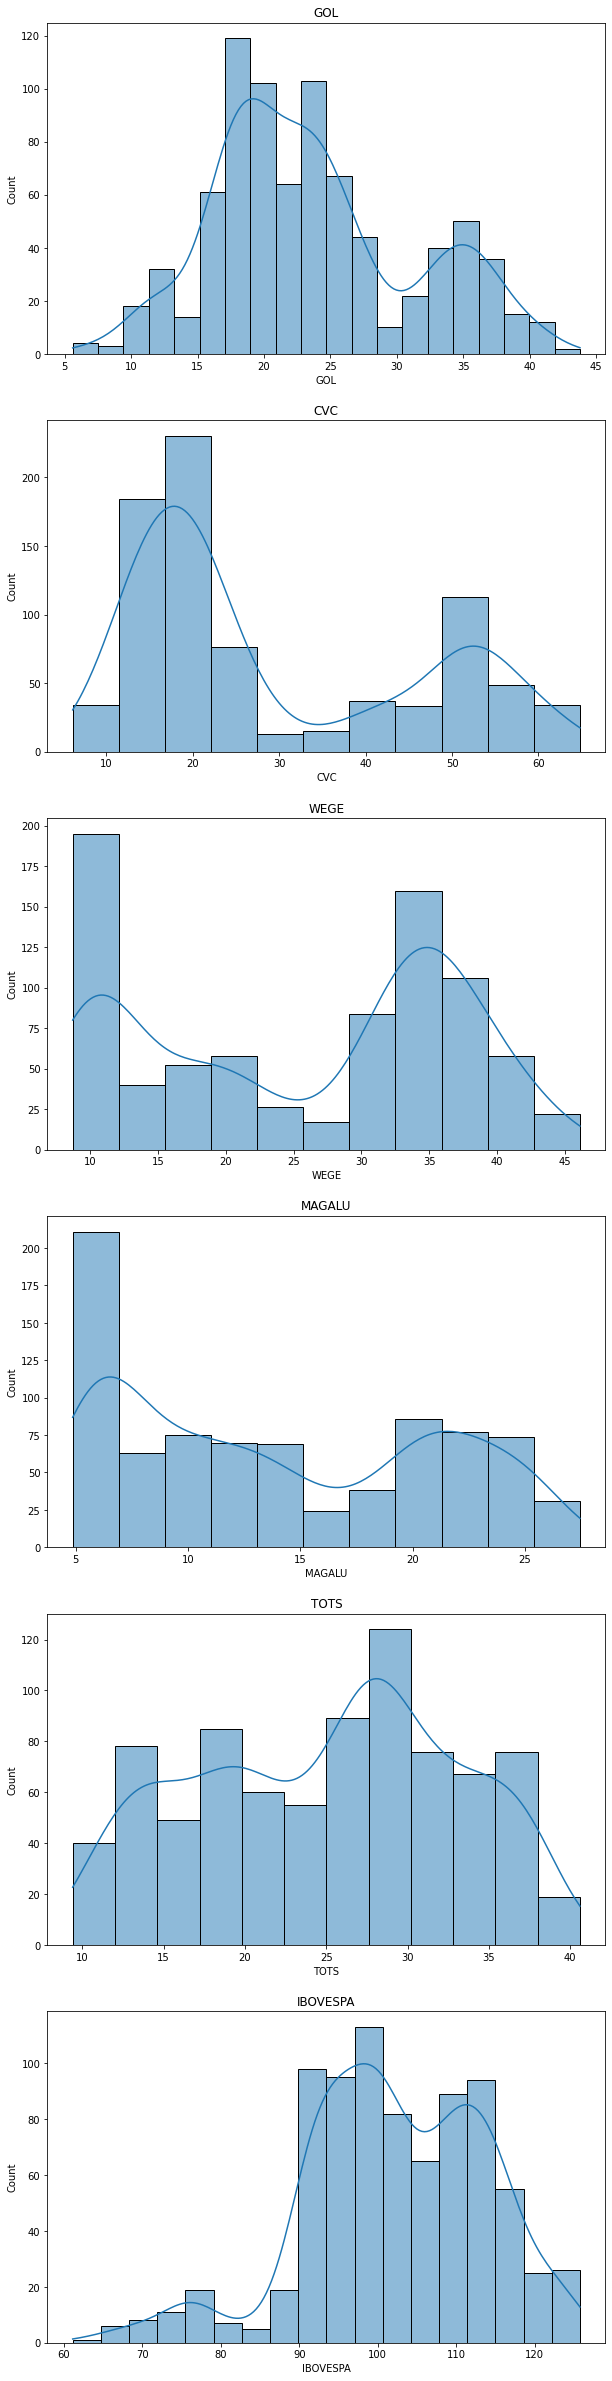

In [12]:
plt.figure(figsize=(10,50))
i=1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde= True)
  plt.title(acoes_df.columns[i])

#Gráfico em Boxplot

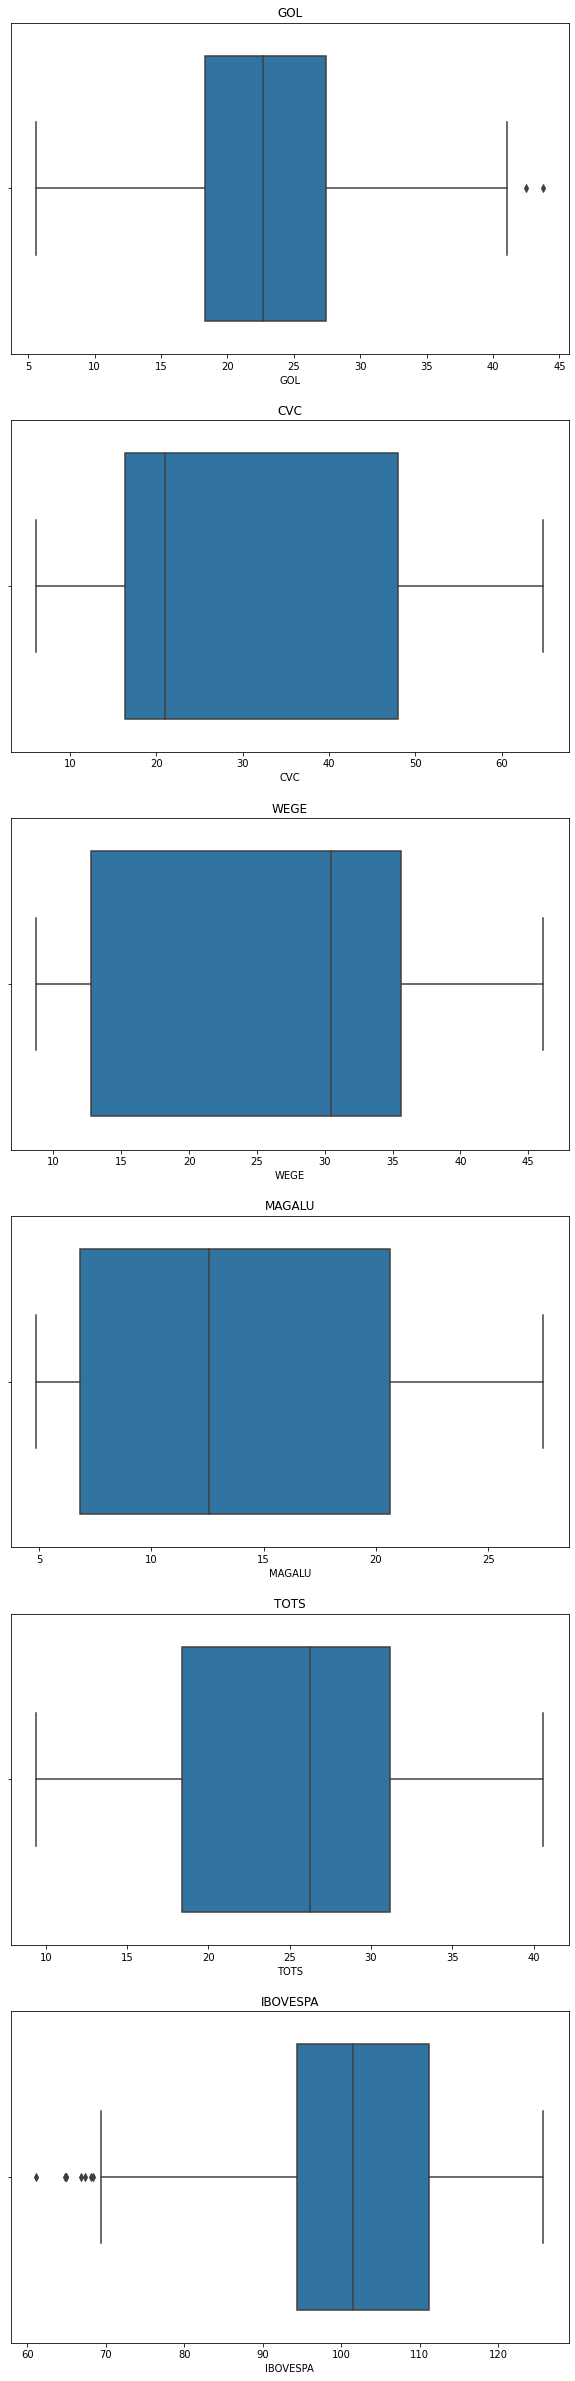

In [13]:
plt.figure(figsize=(10,50))
i=1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.boxplot(x = acoes_df[acoes_df.columns[i]])
  plt.title(acoes_df.columns[i])

#Gráfico dinâmico em linha

In [14]:
fig = px.line(title = "Histórico do preço das ações")
for i in acoes_df.columns[1:]:
  fig.add_scatter(x = acoes_df['Date'], y = acoes_df[i], name = i)
fig.show()

Criação da tabela de ação normalizada

In [15]:
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]
acoes_df_normalizado

,Date,GOL,CVC,WEGE,MAGALU,TOTS,IBOVESPA
0,2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2019-01-03,1.007073,0.993617,1.022803,0.989301,1.023037,1.001138
2,2019-01-04,0.982318,0.981178,1.034483,0.959191,1.051309,1.006826
3,2019-01-07,0.939096,0.993453,1.018354,0.974085,1.028621,1.006598
4,2019-01-08,0.926915,0.960884,1.010011,0.966235,0.986736,1.010580
...,...,...,...,...,...,...,...
813,2022-04-13,0.667976,0.237807,3.621802,1.037475,3.827153,1.280091
814,2022-04-14,0.644401,0.235025,3.591769,1.034034,3.671885,1.270193
815,2022-04-18,0.624361,0.234534,3.549500,1.013388,3.579563,1.268032
816,2022-04-19,0.644794,0.237152,3.489433,1.021990,3.777845,1.261888


#Gráfico dinâmico das ações normalizadas

In [16]:
figura = px.line(title = 'Histórico do preço das ações - normalizado')
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()